# Data Cleaning and Handling NA

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
import pyodbc

In [102]:
from sqlalchemy import engine

engine = sqlalchemy.create_engine('mssql+pyodbc://DESKTOP-L3RMRCF/Customer_CompanyX?driver=ODBC+Driver+17+for+SQL+Server')

In [100]:
# df = pd.read_csv("ExportData_Fact_SalesOrderDetails.csv")
# df
server_name = 'DESKTOP-L3RMRCF'
database_name = 'Customer_CompanyX'

conn_str = (
    r'DRIVER={SQL Server};'
    rf'SERVER={server_name};'
    rf'DATABASE={database_name};'
    'Trusted_Connection=yes;'
)

conn = pyodbc.connect(conn_str)

if conn:
    print('True')

True


In [65]:

df = pd.read_sql_query("select * from FactSalesOrder", con=conn)
df

C:\Users\MinhVo\AppData\Local\Temp\ipykernel_25656\3221578348.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("select * from FactSalesOrder", con=conn)


,FactSalesKey,CustomerKey,DateKey,ProductKey,SalesTerritoryKey,SalesOrderDetailID,OrderNumber,LineNumber,OrderQuantity,UnitPrice,LineTotal,OnlineOrderFlag
0,1,342,839,281,11,1,SO43659,1,1.0,2024.994,2024.994,False
1,2,342,839,282,11,2,SO43659,2,3.0,2024.994,6074.982,False
2,3,342,839,283,11,3,SO43659,3,1.0,2024.994,2024.994,False
3,4,342,839,276,11,4,SO43659,4,1.0,2039.994,2039.994,False
4,5,342,839,277,11,5,SO43659,5,1.0,2039.994,2039.994,False
...,...,...,...,...,...,...,...,...,...,...,...,...
121312,121313,3923,822,383,2,121313,SO75122,1,1.0,21.980,21.980,True
121313,121314,3923,822,217,2,121314,SO75122,2,1.0,8.990,8.990,True
121314,121315,3331,822,383,2,121315,SO75123,1,1.0,21.980,21.980,True
121315,121316,3331,822,384,2,121316,SO75123,2,1.0,159.000,159.000,True


In [66]:
df.isnull().sum()

FactSalesKey           0
CustomerKey            0
DateKey                0
ProductKey             0
SalesTerritoryKey      0
SalesOrderDetailID     0
OrderNumber            0
LineNumber             0
OrderQuantity         15
UnitPrice              3
LineTotal              0
OnlineOrderFlag        0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FactSalesKey        121317 non-null  int64  
 1   CustomerKey         121317 non-null  int64  
 2   DateKey             121317 non-null  int64  
 3   ProductKey          121317 non-null  int64  
 4   SalesTerritoryKey   121317 non-null  int64  
 5   SalesOrderDetailID  121317 non-null  int64  
 6   OrderNumber         121317 non-null  object 
 7   LineNumber          121317 non-null  int64  
 8   OrderQuantity       121302 non-null  float64
 9   UnitPrice           121314 non-null  float64
 10  LineTotal           121317 non-null  float64
 11  OnlineOrderFlag     121317 non-null  bool   
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 10.3+ MB


In [68]:
df['OrderQuantity'] = df['OrderQuantity'].fillna(df['OrderQuantity'].mode()[0])
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mean())

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FactSalesKey        121317 non-null  int64  
 1   CustomerKey         121317 non-null  int64  
 2   DateKey             121317 non-null  int64  
 3   ProductKey          121317 non-null  int64  
 4   SalesTerritoryKey   121317 non-null  int64  
 5   SalesOrderDetailID  121317 non-null  int64  
 6   OrderNumber         121317 non-null  object 
 7   LineNumber          121317 non-null  int64  
 8   OrderQuantity       121317 non-null  float64
 9   UnitPrice           121317 non-null  float64
 10  LineTotal           121317 non-null  float64
 11  OnlineOrderFlag     121317 non-null  bool   
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 10.3+ MB


In [70]:
# date = pd.read_csv('ExportData_Dimension_Date.csv')
# date

date = pd.read_sql_query("select * from DimDate", con=conn)
date

C:\Users\MinhVo\AppData\Local\Temp\ipykernel_25656\2489400447.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  date = pd.read_sql_query("select * from DimDate", con=conn)


,DateKey,OrderDate,DateID,FullDateAlterKey,DayNumberOfWeek,DayNumberOfMonth,DayNumberOfYear,MonthNumberOfYear,CalendarYear,FiscalYear
0,1,2012-05-17,20120517,2012-05-17,5,17,138,5,2012,2012
1,2,2013-03-17,20130317,2013-03-17,1,17,76,3,2013,2013
2,3,2014-04-30,20140430,2014-04-30,4,30,120,4,2014,2014
3,4,2012-09-09,20120909,2012-09-09,1,9,253,9,2012,2012
4,5,2013-11-14,20131114,2013-11-14,5,14,318,11,2013,2013
...,...,...,...,...,...,...,...,...,...,...
1119,1120,2013-08-22,20130822,2013-08-22,5,22,234,8,2013,2013
1120,1121,2013-08-27,20130827,2013-08-27,3,27,239,8,2013,2013
1121,1122,2013-09-03,20130903,2013-09-03,3,3,246,9,2013,2013
1122,1123,2013-09-24,20130924,2013-09-24,3,24,267,9,2013,2013


In [71]:
df_full = df.merge(date[['OrderDate', 'DateKey']], on='DateKey', how='left')
df_full

,FactSalesKey,CustomerKey,DateKey,ProductKey,SalesTerritoryKey,SalesOrderDetailID,OrderNumber,LineNumber,OrderQuantity,UnitPrice,LineTotal,OnlineOrderFlag,OrderDate
0,1,342,839,281,11,1,SO43659,1,1.0,2024.994,2024.994,False,2011-05-31
1,2,342,839,282,11,2,SO43659,2,3.0,2024.994,6074.982,False,2011-05-31
2,3,342,839,283,11,3,SO43659,3,1.0,2024.994,2024.994,False,2011-05-31
3,4,342,839,276,11,4,SO43659,4,1.0,2039.994,2039.994,False,2011-05-31
4,5,342,839,277,11,5,SO43659,5,1.0,2039.994,2039.994,False,2011-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121312,121313,3923,822,383,2,121313,SO75122,1,1.0,21.980,21.980,True,2014-06-30
121313,121314,3923,822,217,2,121314,SO75122,2,1.0,8.990,8.990,True,2014-06-30
121314,121315,3331,822,383,2,121315,SO75123,1,1.0,21.980,21.980,True,2014-06-30
121315,121316,3331,822,384,2,121316,SO75123,2,1.0,159.000,159.000,True,2014-06-30


In [72]:
df_full['OrderDate'] = pd.to_datetime(df_full['OrderDate'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [73]:
df_full

,FactSalesKey,CustomerKey,DateKey,ProductKey,SalesTerritoryKey,SalesOrderDetailID,OrderNumber,LineNumber,OrderQuantity,UnitPrice,LineTotal,OnlineOrderFlag,OrderDate
0,1,342,839,281,11,1,SO43659,1,1.0,2024.994,2024.994,False,2011-05-31
1,2,342,839,282,11,2,SO43659,2,3.0,2024.994,6074.982,False,2011-05-31
2,3,342,839,283,11,3,SO43659,3,1.0,2024.994,2024.994,False,2011-05-31
3,4,342,839,276,11,4,SO43659,4,1.0,2039.994,2039.994,False,2011-05-31
4,5,342,839,277,11,5,SO43659,5,1.0,2039.994,2039.994,False,2011-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121312,121313,3923,822,383,2,121313,SO75122,1,1.0,21.980,21.980,True,2014-06-30
121313,121314,3923,822,217,2,121314,SO75122,2,1.0,8.990,8.990,True,2014-06-30
121314,121315,3331,822,383,2,121315,SO75123,1,1.0,21.980,21.980,True,2014-06-30
121315,121316,3331,822,384,2,121316,SO75123,2,1.0,159.000,159.000,True,2014-06-30


# Data Manipulation

In [74]:
df_full['OrderDate'] = pd.to_datetime(df_full['OrderDate'], format='%Y-%m-%d')
most_recent_date = df_full['OrderDate'].max()
most_recent_date

Timestamp('2014-06-30 00:00:00')

In [75]:
rfm = df_full.groupby("CustomerKey").agg({
    'OrderDate': lambda x: (most_recent_date - x.max()).days,
    'FactSalesKey': 'count',
    'LineTotal': 'sum',
}).reset_index()

rfm.columns = ['CustomerKey', 'Recency', 'Frequency', 'Monetary']

# Print the RFM table
print(rfm)

       CustomerKey  Recency  Frequency     Monetary
0                1      426        128  131102.9823
1                2       60        162  112888.6666
2                3       60        378  519411.3564
3                4       60         45   67941.1934
4                5       60        196  221169.7847
...            ...      ...        ...          ...
19114        19115      103          4     103.4600
19115        19116      336          2      56.9700
19116        19117      110          5     130.5600
19117        19118      167          3      60.4700
19118        19119      257          2      29.4800

[19119 rows x 4 columns]


In [76]:
def R_Score(x):
    if x['Recency'] <=60:
        recency = 3
    elif x['Recency'] >60 and x['Recency'] <=120:
        recency = 2
    else:
        recency = 1
    return recency

rfm['R'] = rfm.apply(R_Score,axis=1)

def F_Score(x):
    if x['Frequency'] <= 3:
        frequency = 3
    elif x['Frequency'] >3 and x['Frequency'] <=6:
        frequency = 2
    else:
        frequency = 1
    return frequency

rfm['F'] = rfm.apply(F_Score,axis=1)


In [77]:
pd.qcut(rfm['Monetary'],q=3).head()


0    (2071.42, 877107.192]
1    (2071.42, 877107.192]
2    (2071.42, 877107.192]
3    (2071.42, 877107.192]
4    (2071.42, 877107.192]
Name: Monetary, dtype: category
Categories (3, interval[float64, right]): [(1.3730000000000002, 71.97] < (71.97, 2071.42] < (2071.42, 877107.192]]

In [78]:
M_Score = pd.qcut(rfm['Monetary'],q=3,labels=range(1,4))
rfm = rfm.assign(M = M_Score.values)

In [79]:
rfm.head()

,CustomerKey,Recency,Frequency,Monetary,R,F,M
0,1,426,128,131102.9823,1,1,3
1,2,60,162,112888.6666,3,1,3
2,3,60,378,519411.3564,3,1,3
3,4,60,45,67941.1934,3,1,3
4,5,60,196,221169.7847,3,1,3


In [80]:
def RFM_Score(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Score'] = rfm.apply(RFM_Score,axis=1)
rfm.head()

,CustomerKey,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,1,426,128,131102.9823,1,1,3,1.01.03.0
1,2,60,162,112888.6666,3,1,3,3.01.03.0
2,3,60,378,519411.3564,3,1,3,3.01.03.0
3,4,60,45,67941.1934,3,1,3,3.01.03.0
4,5,60,196,221169.7847,3,1,3,3.01.03.0


In [81]:
segment = [0]*len(rfm)

best = list(rfm.loc[rfm['RFM_Score']=='333'].index)
lost_cheap = list(rfm.loc[rfm['RFM_Score']=='111'].index)
lost = list(rfm.loc[rfm['RFM_Score']=='133'].index)
lost_almost = list(rfm.loc[rfm['RFM_Score']=='233'].index)

for i in range(0,len(rfm)):
    if rfm['RFM_Score'][i]=='111':
        segment[i]='Lost Cheap Customers'
    elif rfm['RFM_Score'][i]=='133':
        segment[i]='Lost Customers'
    elif rfm['RFM_Score'][i]=='233':
        segment[i]='Almost Lost Customers'
    elif rfm['RFM_Score'][i]=='333':
        segment[i]='Best Customers'
    else:
        segment[i]='Others'

In [82]:
best = list(rfm.loc[rfm['RFM_Score']=='333'].index)
lost_cheap = list(rfm.loc[rfm['RFM_Score']=='111'].index)
lost = list(rfm.loc[rfm['RFM_Score']=='133'].index)
lost_almost = list(rfm.loc[rfm['RFM_Score']=='233'].index)

In [83]:

loyal = list(rfm.loc[rfm['F']==3].index)
loyal2=[]
for i in loyal:
    if i not in best and i not in lost and i not in lost_cheap and i not in lost_almost:
            loyal2.append(i)
for i in rfm.index:
    if i in loyal2:
        segment[i] = 'Loyal Customers'


In [84]:
big = list(rfm.loc[rfm['M']==3].index)
big2=[]
for i in big:
    if i not in best and i not in lost and i not in lost_cheap and i not in lost_almost:
            big2.append(i)
for i in rfm.index:
    if i in big2:
        segment[i] = 'Big Spenders'

In [85]:
rfm['segment'] = segment
rfm.head(20)

,CustomerKey,Recency,Frequency,Monetary,R,F,M,RFM_Score,segment
0,1,426,128,131102.9823,1,1,3,1.01.03.0,Big Spenders
1,2,60,162,112888.6666,3,1,3,3.01.03.0,Big Spenders
2,3,60,378,519411.3564,3,1,3,3.01.03.0,Big Spenders
3,4,60,45,67941.1934,3,1,3,3.01.03.0,Big Spenders
4,5,60,196,221169.7847,3,1,3,3.01.03.0,Big Spenders
5,6,121,273,369056.5332,1,1,3,1.01.03.0,Big Spenders
6,7,518,11,6587.3763,1,1,3,1.01.03.0,Big Spenders
7,8,852,29,87270.1486,1,1,3,1.01.03.0,Big Spenders
8,9,60,150,140130.8409,3,1,3,3.01.03.0,Big Spenders
9,10,822,6,5670.2261,1,2,3,1.02.03.0,Big Spenders


C:\Users\MinhVo\AppData\Local\Temp\ipykernel_25656\2788272366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sq1,x='segment',y='CustomerKey',palette='Greens')


<Axes: xlabel='segment', ylabel='CustomerKey'>

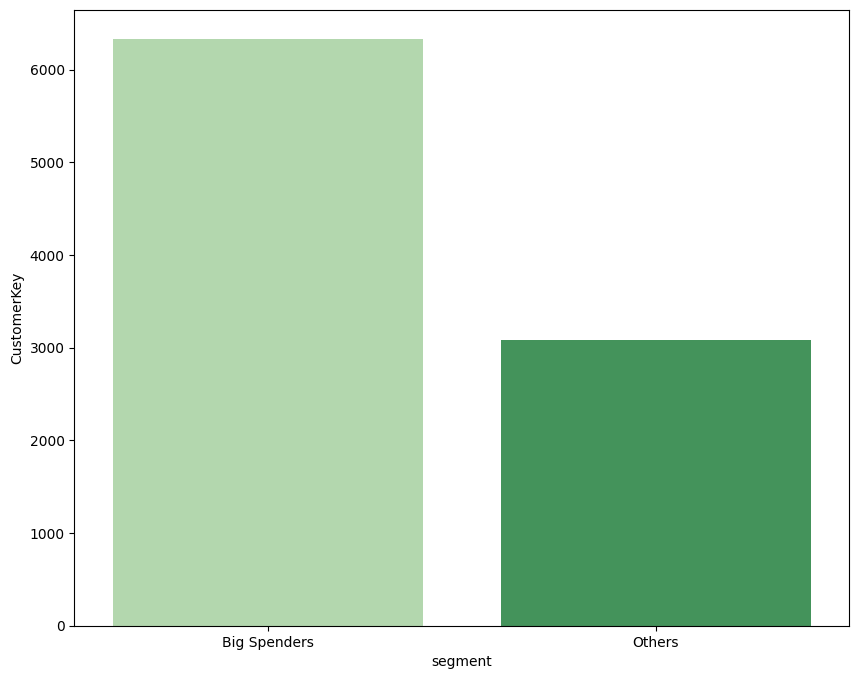

In [86]:
import seaborn as sns
sq1 = rfm.groupby('segment')['CustomerKey'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1,x='segment',y='CustomerKey',palette='Greens')

In [87]:
import squarify
import matplotlib
cmap = matplotlib.cm.coolwarm
mini = min(sq1['CustomerKey'])
maxi = max(sq1['CustomerKey'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sq1['CustomerKey']]

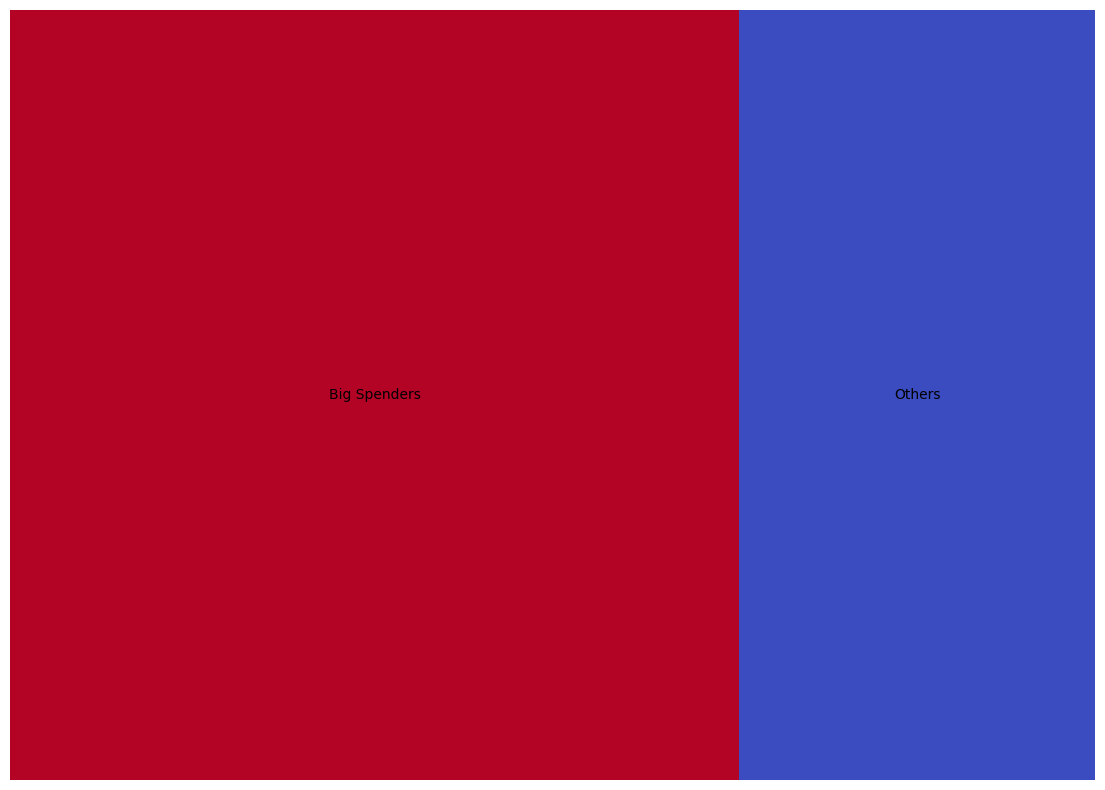

In [88]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14,10)
squarify.plot(sizes=sq1['CustomerKey'], label=sq1.segment,alpha=1,color=colors)
plt.axis('off')
plt.show()

In [104]:
rfm.to_sql("DimRFM",engine ,if_exists='append', chunksize=50)

19119

In [105]:
rfm['Response'] = rfm['segment'].apply(lambda x: 0 if x == 'Big Spenders' else 1)

In [106]:
rfm

,CustomerKey,Recency,Frequency,Monetary,R,F,M,RFM_Score,segment,Response
0,1,426,128,131102.9823,1,1,3,1.01.03.0,Big Spenders,0
1,2,60,162,112888.6666,3,1,3,3.01.03.0,Big Spenders,0
2,3,60,378,519411.3564,3,1,3,3.01.03.0,Big Spenders,0
3,4,60,45,67941.1934,3,1,3,3.01.03.0,Big Spenders,0
4,5,60,196,221169.7847,3,1,3,3.01.03.0,Big Spenders,0
...,...,...,...,...,...,...,...,...,...,...
19114,19115,103,4,103.4600,2,2,2,2.02.02.0,Others,1
19115,19116,336,2,56.9700,1,3,1,1.03.01.0,Loyal Customers,1
19116,19117,110,5,130.5600,2,2,2,2.02.02.0,Others,1
19117,19118,167,3,60.4700,1,3,1,1.03.01.0,Loyal Customers,1
